<a href="https://colab.research.google.com/github/VianeyGuzmanG/EDPI/blob/main/Problema%20de%20Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial^{2} u}{\partial x^2} = \frac{\partial^2 u}{\partial y^2}$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0, \;\;\; 0<a<1$$
Y la condición inicial:
$$u(x,0)=100,\;\;\;u(x,1)=200 \;\;\;0<b<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{\infty} [\frac{200(1-(-1)^{n})}{n \pi} \cosh (n \pi y) + \frac{200[1-(-1)^{n}]}{n \pi} \frac{[2-cosh(n \pi)]}{senh(n \pi)} \sinh(n\pi y)]\sin(n\pi x).$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [1]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [2]:
def rectaf(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i]=100
    return y


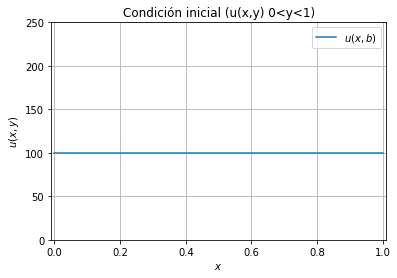

In [3]:
x = linspace(0,1,1000)
f = rectaf(x)
plot(x,f,label='$u(x,b)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Condición inicial (u(x,y) 0<y<1)")
xlim([-0.01,1.01]),ylim([-0.01,250.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=100$.

In [4]:
def u_0(x,N=8): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (((200*(1-(-1)**n)/(n * pi))* cosh(n*pi*0))*sin(n*pi*x) + ((200*(1-(-1)**n))/(n*pi))*((2-cosh(n*pi))/sinh(n*pi))*sinh(n*pi*0)*sin(n*pi*x)) 
    return f

((-0.01, 3.1),
 (-0.01, 250.2),
 None,
 <matplotlib.legend.Legend at 0x7f44a8953be0>)

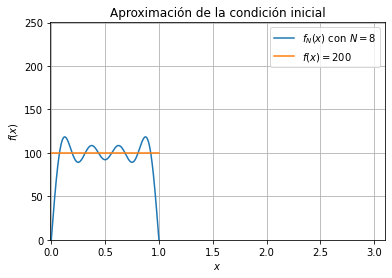

In [5]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=8$')
plot(x,f,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,3.1]),ylim([-0.01,250.2]),grid(),legend()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

((-0.01, 3.01),
 (-0.01, 250.2),
 None,
 <matplotlib.legend.Legend at 0x7f44a5130160>)

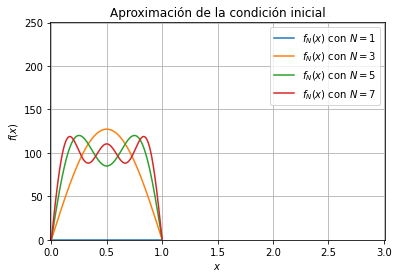

In [6]:
for i in range(1,8,2):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,3.01]),ylim([-0.01,250.2]),grid(),legend()


Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $y=0$.

In [7]:
def u_x_t(x,t,N=8):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += ((((1-(-1)**n)/(n))* cosh(n*pi*t))*sin(n*pi*x) + (((1-(-1)**n))/(n))*((2-cosh(n*pi))/sinh(n*pi))*sinh(n*pi*t)*sin(n*pi*x)) 
    return (200/pi)*f

In [8]:
x = linspace(0,1,100)
t = linspace(0,10,100)
U = u_x_t(x,t)

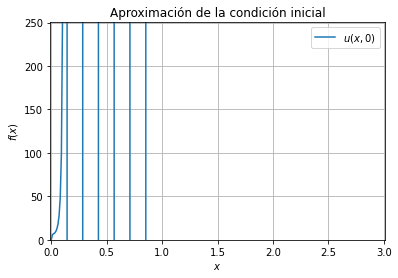

In [9]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,3.01]),ylim([-0.01,250.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

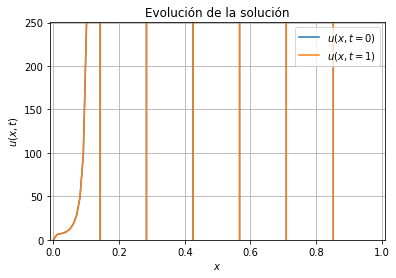

In [10]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,250.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

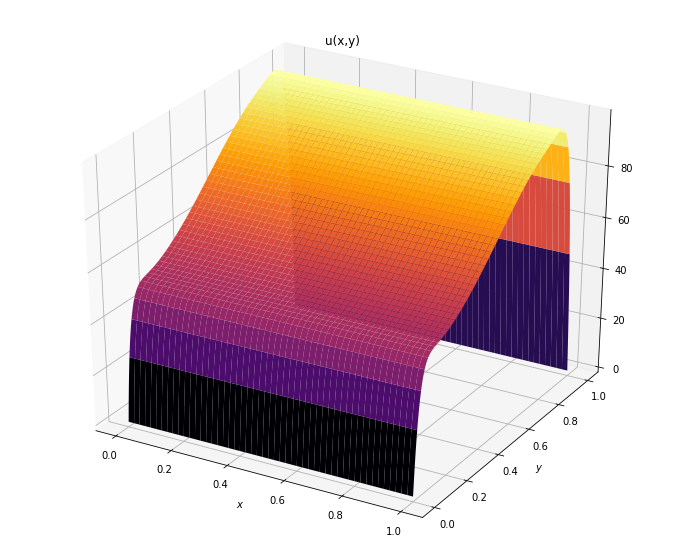

In [11]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("u(x,y)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"